In [1]:
import matplotlib.pyplot as plt
import sympy as sp
from IPython.display import display, Latex
import numpy as np
import scipy.integrate
import controlTheoryToolkit as ctk

In [9]:
A = sp.Matrix([[1, -1], [0, 1]])
B = sp.Matrix([[0], [1]])
C = sp.Matrix([[1, 0]])

l_reg = [-1, -2]
l_det = {1 + sp.I, 1 - sp.I}

display(A)
display(B)
display(C)

Theta = sp.Matrix([[6, -5]])
L = sp.Matrix([[4], [-5]])

symXi = sp.symbols('\\xi_1 \\xi_2', cls=sp.Function)
symX = sp.symbols('x_1 x_2', cls=sp.Function)
symT = sp.symbols('t')


B_1 = A - L * C + B * Theta
A_1 = L * C
B_2 = B * Theta
A_2 = A
display(A_1)
display(B_1)
display(B_2)

Z = sp.Matrix([[A_1, B_1], [A_2, B_2]])
display(Z)

# Eqs = [Eq(symXi[0](t).diff(t), Z[])]



Matrix([
[1, -1],
[0,  1]])

Matrix([
[0],
[1]])

Matrix([[1, 0]])

Matrix([
[ 4, 0],
[-5, 0]])

Matrix([
[-3, -1],
[11, -4]])

Matrix([
[0,  0],
[6, -5]])

Matrix([
[ 4,  0, -3, -1],
[-5,  0, 11, -4],
[ 1, -1,  0,  0],
[ 0,  1,  6, -5]])

Text(0.5, 0.98, 'Система $x$, $\\xi$')

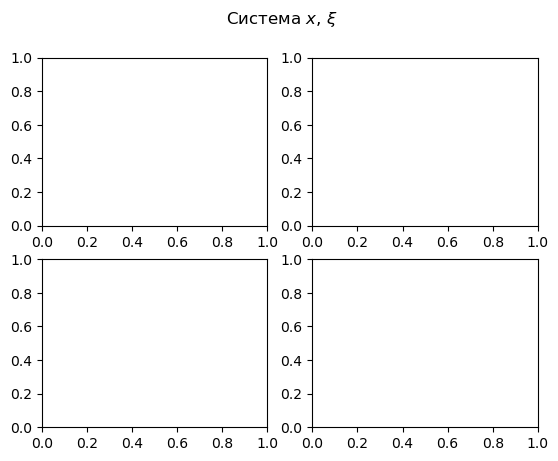

In [10]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Система $x$, $\\xi$')



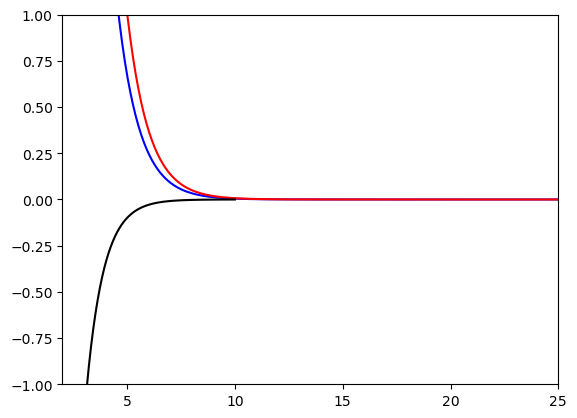

In [11]:
y = sp.symbols('y')
dYdt = -y
t = sp.symbols('t')

fig, ax = plt.subplots()
sols = []

def calc(y_0, color):
    rhs = sp.lambdify((t, y), dYdt)
    T = np.linspace(0, 25, 200)
    sol = scipy.integrate.solve_ivp(rhs, (0, 25), [y_0], t_eval=T)
    ax.plot(T, sol.y.T, color=color)
    sols.append(sol.y.T)

calc(100, 'b')
calc(150, 'r')

ax.set_xlim(2, 25)
ax.set_ylim(-1, 1)

ax.plot(T, [sols[0][i] - sols[1][i] for i in range(100)], 'k')
plt.show()

In [12]:
A = sp.Matrix([[0, 1, 0], [0, 1, 1], [0, 0, 0]], real=True)
B = sp.Matrix([[0], [0], [1]], real=True)
C = sp.Matrix([[1, 0, 0], [0, 0, 1]], real=True)
Q = sp.Matrix([[1, 0, 0], [0, 0, 0], [0, 0, 1]], real=True)
R = 1

display(sp.Matrix([[B, A*B, A*A*B]]))
display(sp.Matrix([[C], [C*A]]))

xs = sp.symbols('x:6')

X = sp.Matrix([[xs[0], xs[1], xs[2]], [xs[1], xs[3], xs[4]], [xs[2], xs[4] ,xs[5]]], real=True)
# X = sp.MatrixSymbol('X', 3, 3)
ri = Q + A.T * X + X*A - X*B*1 * B.T * X
display(ri)
sol = sp.solve(ri, X)
display(sol)
display(X)

Matrix([
[0, 0, 1],
[0, 1, 1],
[1, 0, 0]])

Matrix([
[1, 0, 0],
[0, 0, 1],
[0, 1, 0],
[0, 0, 0]])

Matrix([
[      1 - x2**2,      x0 + x1 - x2*x4,           x1 - x2*x5],
[x0 + x1 - x2*x4,  2*x1 + 2*x3 - x4**2, x2 + x3 - x4*x5 + x4],
[     x1 - x2*x5, x2 + x3 - x4*x5 + x4,     2*x4 - x5**2 + 1]])

KeyboardInterrupt: 

In [ ]:
approx_sols = []
for s in sol:
    t = []
    for x in s:
        t.append(x.evalf())
    approx_sols.append(sp.Matrix([[t[0], t[1], t[2]], [t[1], t[3], t[4]], [t[2], t[4] ,t[5]]]))

for x in approx_sols:
    evals = x.eigenvals()
    is_sol = False
    for v in evals:
        if not v.is_real:
            is_sol = False
            break
        if  v <= 0:
            is_sol = False
            break
    if is_sol:
        X = x

# display(approx_sols)
display(X)

Matrix([
[x0, x1, x2],
[x1, x3, x4],
[x2, x4, x5]])

In [ ]:
A = sp.Matrix([[0, 1, 0], [0, 1, 1], [0, 0, 0]], real=True)
B = sp.Matrix([[0], [0], [1]], real=True)
C = sp.Matrix([[1, 0, 0], [0, 0, 1]], real=True)
Q = sp.Matrix([[1, 0, 0], [0, 0, 0], [0, 0, 1]], real=True)
R = sp.Matrix([[1]])


In [ ]:

display(ctk.AlgebraicRiccatiSol(A, B, Q, R))

Matrix([
[2.50975533249339, 3.64943591448949,              1.0],
[3.64943591448949, 15.3183824939658, 6.15919124698288],
[             1.0, 6.15919124698288, 6.15919124698288]])

Matrix([
[2*t**3 - 10*x[0, 0] + x[2, 0] + 1],
[                    t + 3*x[2, 0]],
[        2*t - x[1, 0] + 2*x[2, 0]]])

Matrix([
[        2*x[1, 0]],
[ sin(x[1, 0]) - 2],
[x[0, 0] + x[2, 0]]])

array([[ 1.10000000e+00,  1.00000000e-01,  0.00000000e+00],
       [ 1.10526959e+00, -1.01594818e-01,  1.18166751e-01],
       [ 1.07830390e+00, -3.22268210e-01,  2.52113787e-01],
       [ 1.01589451e+00, -5.60722955e-01,  4.04193885e-01],
       [ 9.16039392e-01, -8.13842246e-01,  5.76748292e-01],
       [ 7.79781606e-01, -1.07650541e+00,  7.72524745e-01],
       [ 6.11313979e-01, -1.34158699e+00,  9.94699765e-01],
       [ 4.18345775e-01, -1.60023150e+00,  1.24732211e+00],
       [ 2.13848906e-01, -1.84372552e+00,  1.53583967e+00],
       [ 1.58525702e-02, -2.06464355e+00,  1.86737196e+00],
       [-1.52132162e-01, -2.25740041e+00,  2.25323206e+00],
       [-2.61068950e-01, -2.41828177e+00,  2.70903790e+00],
       [-2.76396181e-01, -2.54544413e+00,  3.25471224e+00],
       [-1.57841841e-01, -2.63873663e+00,  3.91520146e+00],
       [ 1.41069303e-01, -2.69844788e+00,  4.72387137e+00],
       [ 6.72442359e-01, -2.72553645e+00,  5.72112850e+00],
       [ 1.49595905e+00, -2.72089401e+00

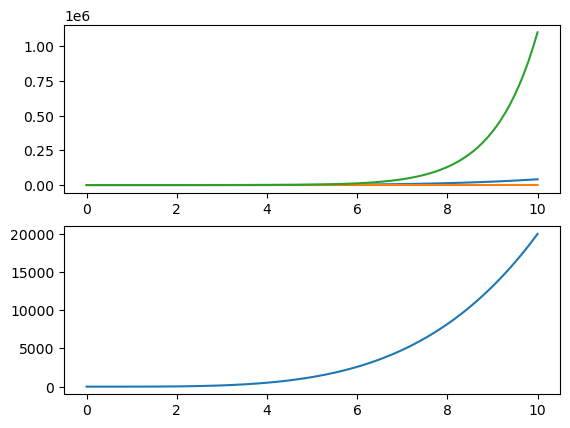

In [16]:
x = sp.MatrixSymbol('x', 3, 1).as_explicit()
t = sp.symbols('t', real=True)
A = sp.Matrix([[-10, 0, 1], [0, 0, 3], [0, -1, 2]], real=True)
b = sp.Matrix([[1 + 2* t**3], [t], [2 * t]])
u = sp.Matrix([t])

display(A * x + b)
T = np.linspace(0, 10, 100)
# solution, U = ctk.solveLinearSystem(t, x, A, u, b, [1.1, 0.1, 0], (0, 10), T)

F = sp.Matrix(
    [[2*x[1]],
    [sp.sin(x[1]) - 2],
    [x[0] + x[2]]]
)
display(F)
solution, U = ctk.solveCommonSystem(t, x, F, b * u, [1.1, 0.1, 0], (0, 10), T)
display(solution.y.T)

fig, ax = plt.subplots(2)
ax[0].plot(T, solution.y.T)
ax[1].plot(T, U)
plt.show()


In [18]:
x = sp.MatrixSymbol('x', 2, 1).as_explicit()
X = sp.MatrixSymbol('X', 2, 2).as_explicit()
X = X.upper_triangular(1) + X.upper_triangular().T
a = sp.symbols('a', real=True)

Q = sp.Matrix([[1, 0], [0, 0]])
R = sp.Matrix([1])
B = sp.Matrix([[0], [a]])
A = sp.Matrix([[0, 1], [0, 0]])

RiccatiEq = Q + A.T * X + X * A - X * B * R.inv() * B.T * X
display(RiccatiEq)

Matrix([
[           -a**2*X[0, 1]**2 + 1, -a**2*X[0, 1]*X[1, 1] + X[0, 0]],
[-a**2*X[0, 1]*X[1, 1] + X[0, 0],    -a**2*X[1, 1]**2 + 2*X[0, 1]]])

In [ ]:
X = sp.Matrix([[sp.sqrt(2) * a**0.25, a**-0.5], [a**-0.5, sp.sqrt(2) * a**-1.25]])
display(X)

u = -R.inv() * B.T * X * x
display(u)
display(x)

Matrix([
[sqrt(2)*a**0.25,       a**(-0.5)],
[      a**(-0.5), sqrt(2)/a**1.25]])

Matrix([[-sqrt(2)*x[1, 0]/a**0.25 - a**0.5*x[0, 0]]])

Matrix([
[x[0, 0]],
[x[1, 0]]])

In [29]:
A_c = A + B * sp.Matrix([[-a**0.5, - sp.sqrt(2) / a**0.25]])
display(A_c)
display(list(A_c.eigenvals())[0])
display(list(A_c.eigenvals())[1])

Matrix([
[      0,                1],
[-a**1.5, -sqrt(2)*a**0.75]])

-sqrt(2)*a**0.75/2 - sqrt(2)*sqrt(-a**1.5)/2

-sqrt(2)*a**0.75/2 + sqrt(2)*sqrt(-a**1.5)/2

In [2]:
display(1./6. * sp.Matrix([[1, 1], [-1, 1]]) * (sp.Matrix([[4.41], [0.97]]) + sp.Matrix([[4.43], [0.39]]) + sp.Matrix([[5.2], [-1.03]])))

Matrix([
[ 2.395],
[-2.285]])

In [9]:
C = sp.Matrix([[0.6931**2, 0.6931, 1], [1.0986**2, 1.0986, 1], [1.3863**2, 1.3863, 1], [1.6094**2, 1.6094, 1], [1.7918**2, 1.7918, 1]])
y = sp.Matrix([[0.4055], [1.0986], [1.5041], [1.9459], [2.1401]])
Cm = C.T * C
CmInv = Cm.inv()
display(Cm)
display(CmInv)
CmInvCT = CmInv * C.T
display()
display(CmInvCT * y)

Matrix([
[22.3974402568392, 14.24438634761, 9.40985286],
[  14.24438634761,     9.40985286,     6.5792],
[      9.40985286,         6.5792,          5]])

Matrix([
[  12.578995216078, -31.1271085095251,  17.2849956391858],
[-31.1271085095251,  78.3535711208153, -44.5204608172366],
[ 17.2849956391858, -44.5204608172366,  26.2519500316565]])

Matrix([
[-0.120087383634538],
[  1.89762892429019],
[-0.852135121669505]])

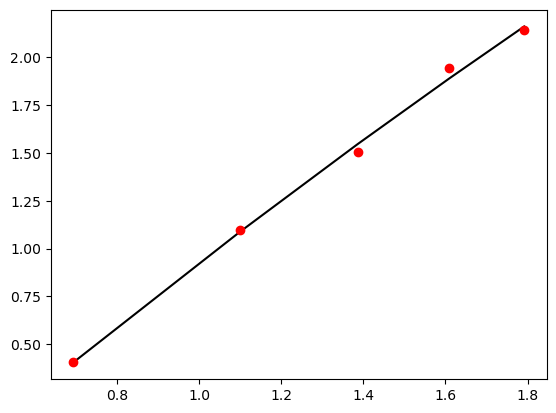

In [12]:
Xs = [0.6931, 1.0986, 1.3863, 1.6094, 1.7918]
Y1s = [-0.12008 * x**2 + 1.89672 * x -0.85213 for x in Xs]
Y2s = [0.4055, 1.0986, 1.5041, 1.9459, 2.1401]
plt.plot(Xs, Y1s, 'k-')
plt.plot(Xs, Y2s, 'ro')
plt.show()

Matrix([
[1.68730957, 1.7917],
[    1.7917,      2]])

Matrix([
[ 12.1632120610411, -10.8964135248837],
[-10.8964135248837,   10.261552056267]])

Matrix([
[  1.70924784217016],
[-0.779179679408138]])

3

Matrix([[1.3863, 1]])

Matrix([
[3.60913726, 3.178],
[     3.178,     3]])

Matrix([
[  1.59299115941403],
[-0.684775301539262]])

4

Matrix([[1.6094, 1]])

Matrix([
[6.19930562, 4.7874],
[    4.7874,      4]])

Matrix([
[   1.6517889667549],
[-0.738418624860603]])

5

Matrix([[1.7918, 1]])

Matrix([
[9.40985286, 6.5792],
[    6.5792,      5]])

Matrix([
[  1.60046901948016],
[-0.687121154592767]])

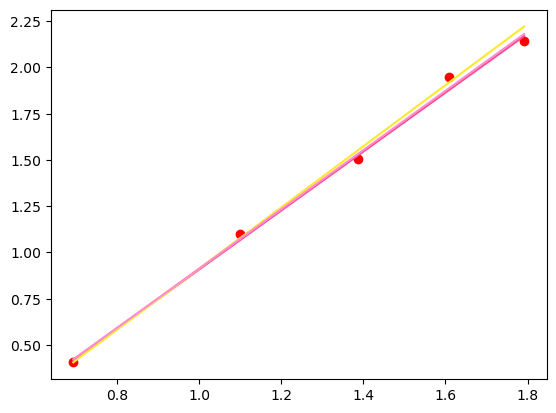

In [46]:
# Reccur LSM
Xs = [0.6931, 1.0986, 1.3863, 1.6094, 1.7918]
Yrefs = [0.4055, 1.0986, 1.5041, 1.9459, 2.1401]
C_0 = sp.Matrix([[0.6931, 1], [1.0986, 1]])
y_0 = sp.Matrix([[0.4055], [1.0986]])
H_0 = C_0.T * C_0
H_0Inv = H_0.inv()
display(H_0)
display(H_0Inv)
H_0InvCT = H_0Inv * C.T
coefs_0 = H_0InvCT * y_0
display(coefs_0)

N = 5
H = [H_0]
coefs = [coefs_0]
plt.plot(Xs, Yrefs, 'ro')
for i in range(2, N):
    display(i + 1)
    test = sp.Matrix([[Xs[i], 1]])
    H.append(H[i - 2] + test.T * test)
    display(test)
    display(H[i - 1])
    coefs.append(coefs[i - 2] + H[i - 1].inv() * test.T * (sp.Matrix([Yrefs[i]]) - test * coefs[i - 2]))
    display(coefs[i - 1])
    dots = [coefs[i - 1][0] * x + coefs[i - 1][1] for x in Xs]
    color = lambda k : (1, ((7 * k) % 11) / 11., ((7 * k  + 3) % 11) / 11.)
    plt.plot(Xs, dots, c = color(i))



In [21]:
s1, s2, sx = sp.symbols('sigma_1 sigma_2 sigma_x', real=True)
b = sp.symbols('beta', real=True)

X = sp.Matrix([[sx**2]])
C = sp.Matrix([[1], [1]])
W = sp.Matrix([[s1**2, b * s1 * s2], [b * s1 * s2, s2**2]])

L = X * C.T * (W + C * X * C.T).inv()
L.simplify()

display(L)



Matrix([[sigma_2*sigma_x**2*(beta*sigma_1 - sigma_2)/(beta**2*sigma_1**2*sigma_2**2 + 2*beta*sigma_1*sigma_2*sigma_x**2 - sigma_1**2*sigma_2**2 - sigma_1**2*sigma_x**2 - sigma_2**2*sigma_x**2), sigma_1*sigma_x**2*(beta*sigma_2 - sigma_1)/(beta**2*sigma_1**2*sigma_2**2 + 2*beta*sigma_1*sigma_2*sigma_x**2 - sigma_1**2*sigma_2**2 - sigma_1**2*sigma_x**2 - sigma_2**2*sigma_x**2)]])

In [ ]:
t = sp.symbols('t', real=True)
